<a href="https://colab.research.google.com/github/rajiv1977/AI/blob/main/ConvolutionalNeuralNetworkImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolution Neural Network Implementation for image processing** \
**Example: Correctly identifying numbers between 0 - 9 on an image**

**Import packages**

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**Load data**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Understanding the image data format**

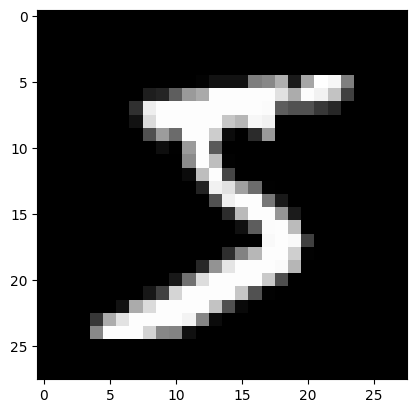

In [ ]:
X_train[0].shape
plt.imshow(X_train[0], cmap='gray')

In [ ]:
y_train[0]

5

**Preprocessing the image data**

In [ ]:
num_classes = 10
epochs = 3

image_height, image_width = 28, 28
X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**How to tackle the overfitting** \
1.	Dropout of nodes randomly \
2.	Augmentation \


**Build model**

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [ ]:
history_cnn = cnn.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

#cnn.load_weights('cnn_model.h5') # for an already existing model


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 242s 128ms/step - accuracy: 0.9346 - loss: 0.2062 - val_accuracy: 0.9885 - val_loss: 0.0350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 267s 130ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9891 - val_loss: 0.0330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 247s 132ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9878 - val_loss: 0.0404
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 130ms/step - accuracy: 0.9942 - loss: 0.0186 - val_accuracy: 0.9925 - val_loss: 0.0235
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 257s 128ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 0.9881 - val_loss: 0.0439


**What is the accuracy of the model?**

**Plot the accuracy of the training model**

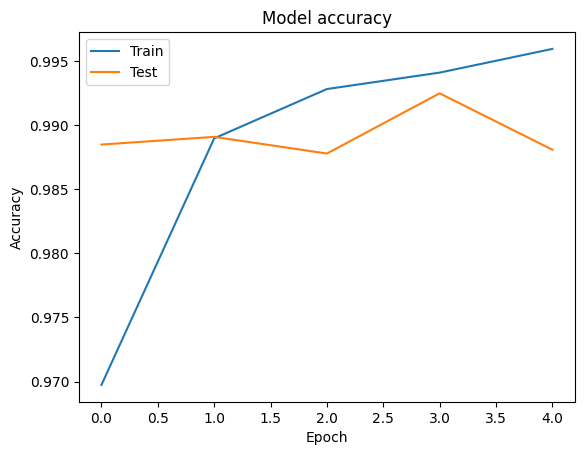

In [ ]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

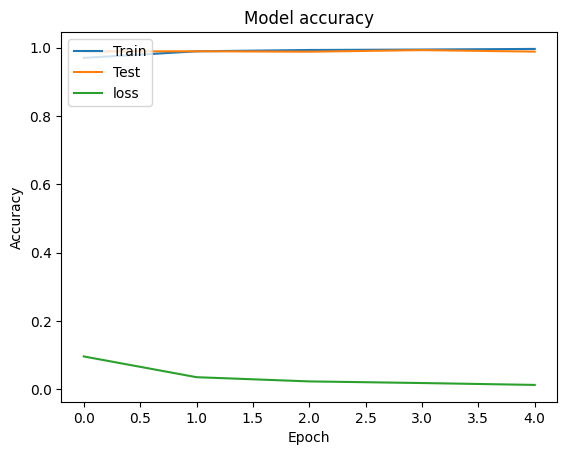

In [ ]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.plot(history_cnn.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test', 'loss'], loc='upper left')

**Evaluvating the model**

In [ ]:
score = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9869 - loss: 0.0478
